# Unique Values & value Counts

In [1]:
import numpy as np
import pandas as pd

obj=pd.Series(["c","a","d",'a',"a","b","b","c","c"])

uniques=obj.unique()

uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [2]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

# Data Loading

In [3]:
df=pd.read_csv("examples/ex1.csv")
df.head()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
pd.read_csv("examples/ex2.csv")

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [5]:
pd.read_csv("examples/ex2.csv",header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
pd.read_csv("examples/ex2.csv",names=["a","b","c","d","message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
names=['a',"b","c","d","message"]

pd.read_csv("examples/ex2.csv",names=names,index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [8]:
result= pd.read_csv("examples/ex3.txt",sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [9]:
pd.read_csv("examples/ex4.csv",skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
result.to_csv("out.csv") # saving as a csv file

# Data Cleaning & Preparation

Handling Missing Data

In [11]:
float_data= pd.Series([1.2,-3.5,np.nan,0])

float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [12]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [13]:
string_data= pd.Series(["aardvark",np.nan,None,"avocado"])

string_data

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [14]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [15]:
float_data= pd.Series([1,2,None],dtype="float64")

float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [16]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

In [17]:
data=pd.Series([1,np.nan,3.5,np.nan,7])

data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [18]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [19]:
data=pd.DataFrame([[1.,6.5,3.],[1.,np.nan,np.nan],
                  [np.nan,np.nan,np.nan],[np.nan,6.5,3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [20]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [21]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [22]:
data[4]=np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
data.dropna(axis="columns",how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [24]:
df= pd.DataFrame(np.random.standard_normal((7,3)))

df.iloc[:4,1]=np.nan

df.iloc[:2,2]=np.nan

df

,0,1,2
0,-0.711995,NaN,NaN
1,-0.812894,NaN,NaN
2,0.230232,NaN,-0.718026
3,1.251586,NaN,1.163953
4,1.590257,0.782813,0.151410
5,-0.635975,1.189958,-1.327697
6,-0.616802,0.222181,-0.617188


In [25]:
df.dropna()

,0,1,2
4,1.590257,0.782813,0.151410
5,-0.635975,1.189958,-1.327697
6,-0.616802,0.222181,-0.617188


In [26]:
df.dropna(thresh=2)

,0,1,2
2,0.230232,NaN,-0.718026
3,1.251586,NaN,1.163953
4,1.590257,0.782813,0.151410
5,-0.635975,1.189958,-1.327697
6,-0.616802,0.222181,-0.617188


Filling in Missing Data

In [27]:
df

,0,1,2
0,-0.711995,NaN,NaN
1,-0.812894,NaN,NaN
2,0.230232,NaN,-0.718026
3,1.251586,NaN,1.163953
4,1.590257,0.782813,0.151410
5,-0.635975,1.189958,-1.327697
6,-0.616802,0.222181,-0.617188


In [28]:
df.fillna(0)

,0,1,2
0,-0.711995,0.000000,0.000000
1,-0.812894,0.000000,0.000000
2,0.230232,0.000000,-0.718026
3,1.251586,0.000000,1.163953
4,1.590257,0.782813,0.151410
5,-0.635975,1.189958,-1.327697
6,-0.616802,0.222181,-0.617188


In [29]:
df= pd.DataFrame(np.random.standard_normal((6,3)))

df.iloc[2:,1]=np.nan

df.iloc[4:,2]=np.nan

df

,0,1,2
0,0.863768,-2.469522,-0.584884
1,-2.215625,-1.852654,-0.517335
2,-0.510031,NaN,0.434523
3,-0.969484,NaN,0.493271
4,1.044961,NaN,NaN
5,0.145892,NaN,NaN


In [30]:
df.fillna(method="ffill")

,0,1,2
0,0.863768,-2.469522,-0.584884
1,-2.215625,-1.852654,-0.517335
2,-0.510031,-1.852654,0.434523
3,-0.969484,-1.852654,0.493271
4,1.044961,-1.852654,0.493271
5,0.145892,-1.852654,0.493271


In [31]:
df.fillna(method="ffill",limit=2)

,0,1,2
0,0.863768,-2.469522,-0.584884
1,-2.215625,-1.852654,-0.517335
2,-0.510031,-1.852654,0.434523
3,-0.969484,-1.852654,0.493271
4,1.044961,NaN,0.493271
5,0.145892,NaN,0.493271


In [32]:
data= pd.DataFrame({"k1":["one","two"]*3+["two"],
                   "k2":[1,1,2,3,3,4,4]})

data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [33]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [34]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [35]:
data['v1']=range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [36]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [37]:
data.drop_duplicates(["k1","k2"],keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [38]:
data=pd.Series([1.,-999.,2,-999.,-1000.,3.])

data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [39]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [40]:
data.replace([-999,1000],np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [41]:
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [42]:
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [43]:
data=pd.DataFrame(np.arange(12).reshape((3,4)),
                 index=["Ohio","Colorado","New York"],
                 columns=["one","two","three","four"])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [44]:
def transform(x):
    return x[:4].upper()

In [45]:
data.index=data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [46]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [47]:
data.rename(index={"OHIO":"INDIANA"}, columns={"three":"peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


# String Manipulation

In [48]:
val="a,b, guido"

val.split(",")

['a', 'b', ' guido']

In [49]:
pieces=[x.strip() for x in val.split(",")]

pieces

['a', 'b', 'guido']

In [50]:
first, second,third=pieces

first+"::"+second+"::"+third

'a::b::guido'

In [51]:
"::".join(pieces)

'a::b::guido'

# Data Wrangling

In [52]:
data=pd.Series(np.random.uniform(size=9),
              index=[["a","a","a","b","b","c","c",'d',"d"],
                    [1,2,3,1,3,1,2,2,3]])

data

a  1    0.949964
   2    0.335623
   3    0.411622
b  1    0.762096
   3    0.522875
c  1    0.882232
   2    0.944319
d  2    0.011797
   3    0.628249
dtype: float64

In [53]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [54]:
data['b']

1    0.762096
3    0.522875
dtype: float64

In [55]:
data["b"][3]

0.5228752907751681

In [56]:
data["b":"c"]

b  1    0.762096
   3    0.522875
c  1    0.882232
   2    0.944319
dtype: float64

In [57]:
data.loc[["b","d"]]

b  1    0.762096
   3    0.522875
d  2    0.011797
   3    0.628249
dtype: float64

In [58]:
data.unstack()

,1,2,3
a,0.949964,0.335623,0.411622
b,0.762096,NaN,0.522875
c,0.882232,0.944319,NaN
d,NaN,0.011797,0.628249


In [59]:
frame=pd.DataFrame(np.arange(12).reshape((4,3)),
                  index=[["a","a","b","b"],[1,2,1,2]],
                  columns=[["Ohio","Ohio","Colorado"],["Green","Red","Green"]])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [60]:
frame.index.names=["key1","key2"]

In [61]:
frame.columns.names=["state","color"]

In [62]:
frame.index.nlevels

2

# Combining and Merging Datasets

pandas.merge

Connect rows in DataFrames based on one or more keys

pandas.concat

Concatenate or stack objects together along an axis

combine_first

Splice together overlapping data to fill in miing values in one object with values from another

In [63]:
df1= pd.DataFrame({"key":["b","b","a","c","a",'a',"b"],
                  "data1":pd.Series(range(7),dtype="Int64")})

df2=pd.DataFrame({"key":["a","b","d"],
                "data2":pd.Series(range(3),dtype="Int64")})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [64]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [65]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [66]:
df3= pd.DataFrame({"lkey":["b","b","a","c","a",'a',"b"],
                  "data1":pd.Series(range(7),dtype="Int64")})

df4=pd.DataFrame({"rkey":["a","b","d"],
                "data2":pd.Series(range(3),dtype="Int64")})

pd.merge(df3, df4, left_on="lkey",right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [67]:
pd.merge(df1,df2, how="outer")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,<NA>
7,d,<NA>,2


In [68]:
pd.merge(df3,df4, left_on="lkey",right_on='rkey',how="outer")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [69]:
df1= pd.DataFrame({"key":["b","b","a","c","a","b"],
                  "data1":pd.Series(range(6),dtype="Int64")})

df2=pd.DataFrame({"key":["a","b","a","b","d"],
                "data2":pd.Series(range(5),dtype="Int64")})

df1


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [70]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [71]:
pd.merge(df1,df2, on="key",how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [72]:
pd.merge(df1,df2,how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [73]:
left=pd.DataFrame({"key1":["foo","foo","bar"],
                  "key2":["one","two","three"],
                 "lval":pd.Series([1,2,3],dtype='Int64')})

right=pd.DataFrame({"key1":["foo","foo","bar","bar"],
                    "key2":["one","one","one","two"],
                    "rval":pd.Series([4,5,6,7],dtype='Int64')})

left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,three,3


In [74]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [75]:
pd.merge(left, right, on=["key1","key2"],how="outer")

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,<NA>
3,bar,three,3,<NA>
4,bar,one,<NA>,6
5,bar,two,<NA>,7


In [76]:
left1=pd.DataFrame({"key":["a","b","a","a","b","c"],
                   "value":pd.Series(range(6),dtype="Int64")})

right1=pd.DataFrame({"group_val":[3.5,7]}, index=["a","b"])

left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [77]:
right1

,group_val
a,3.5
b,7.0


In [78]:
pd.merge(left1, right1, left_on="key", right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


# Concatenating along an axis

In [79]:
arr=np.arange(12).reshape((3,4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [81]:
np.concatenate([arr,arr])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [82]:
s1= pd.Series([0,1], index=["a","b"],dtype="Int64")

s2=pd.Series([2,3,4],index=["c","d","e"],dtype="Int64")

s3=pd.Series([5,6],index=["f","g"],dtype="Int64")

In [83]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [84]:
pd.concat([s1,s2,s3],axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


# Plotting and Visualisation

In [85]:
import matplotlib.pyplot as plt

In [86]:
data=np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

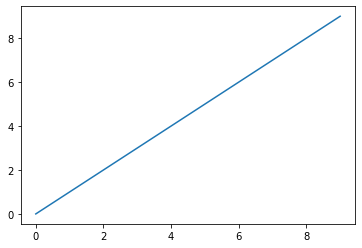

In [87]:
plt.plot(data)

Plots in matplotlib reside within a figure object

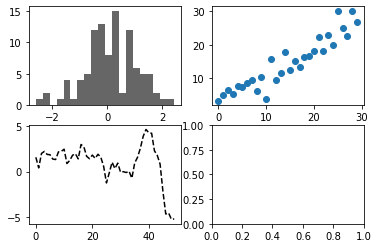

In [88]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax1.hist(np.random.standard_normal(100),bins=20,color="black",alpha=0.6)

ax2=fig.add_subplot(2,2,2)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.standard_normal(30))

ax3=fig.add_subplot(2,2,3)
ax3.plot(np.random.standard_normal(50).cumsum(),color="black", linestyle="dashed")

ax4=fig.add_subplot(2,2,4)

<Figure size 432x288 with 0 Axes>

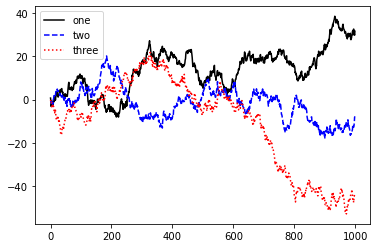

In [89]:
fig=plt.figure()
fig,ax=plt.subplots()

ax.plot(np.random.randn(1000).cumsum(),color="black",label="one")

ax.plot(np.random.randn(1000).cumsum(),color="blue",linestyle="dashed", label="two")

ax.plot(np.random.randn(1000).cumsum(),color="red",linestyle="dotted",label="three")

ax.legend()

# Bar Plot

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

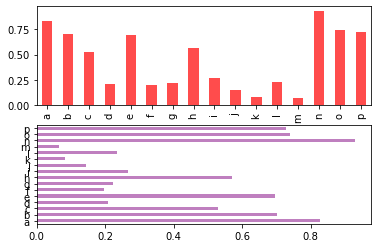

In [90]:
fig=plt.figure()
fig,axes=plt.subplots(2,1)

data=pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0],color="red",alpha=0.7)

data.plot.barh(ax=axes[1],color="purple",alpha=.5)

In [91]:
df= pd.DataFrame(np.random.uniform(size=(6,4)),
                index=["one","two","three","four","five","six"],
                columns=pd.Index(["A","B","C","D"],name="Genus"))

df

Genus,A,B,C,D
one,0.259545,0.629958,0.136075,0.278995
two,0.490748,0.089314,0.400925,0.058851
three,0.870318,0.591114,0.855333,0.033344
four,0.133697,0.841445,0.604745,0.812120
five,0.231377,0.081895,0.850568,0.264372
six,0.367630,0.932954,0.034274,0.760234


<AxesSubplot:>

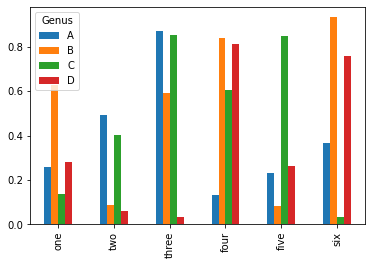

In [92]:
df.plot.bar()

<AxesSubplot:>

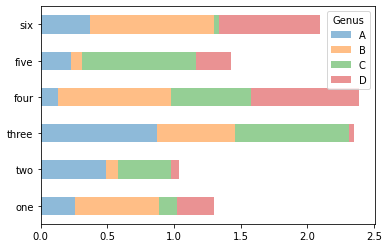

In [93]:
df.plot.barh(stacked=True, alpha=0.5)

<AxesSubplot:>

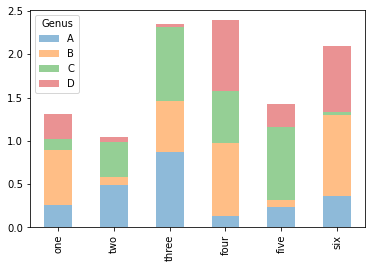

In [94]:
df.plot.bar(stacked=True, alpha=0.5)